In [125]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
# To fetch financial data
import yfinance as yf

# For visualisation
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

C:\Users\Teacher\AppData\Local\Temp\ipykernel_15792\992771814.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [126]:
df = pd.read_csv('GBPUSD1440.csv',delimiter=',')
df.columns =['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
df

,Date,Time,Open,High,Low,Close,Volume
0,2016.11.23,00:00,1.24212,1.24671,1.23587,1.24252,61588
1,2016.11.24,00:00,1.24250,1.24928,1.24003,1.24497,53849
2,2016.11.25,00:00,1.24494,1.24800,1.24139,1.24738,61200
3,2016.11.27,00:00,1.24585,1.24799,1.24482,1.24782,1941
4,2016.11.28,00:00,1.24781,1.25296,1.23839,1.24064,63375
...,...,...,...,...,...,...,...
2043,2023.06.12,00:00,1.25792,1.25990,1.24864,1.25140,39154
2044,2023.06.13,00:00,1.25139,1.26242,1.25128,1.26059,49789
2045,2023.06.14,00:00,1.26058,1.26985,1.26001,1.26702,50186
2046,2023.06.15,00:00,1.26703,1.27900,1.26291,1.27841,50135


In [127]:
df = df[['Close', 'Open', 'High', 'Low']]

In [128]:
df

,Close,Open,High,Low
0,1.24252,1.24212,1.24671,1.23587
1,1.24497,1.24250,1.24928,1.24003
2,1.24738,1.24494,1.24800,1.24139
3,1.24782,1.24585,1.24799,1.24482
4,1.24064,1.24781,1.25296,1.23839
...,...,...,...,...
2043,1.25140,1.25792,1.25990,1.24864
2044,1.26059,1.25139,1.26242,1.25128
2045,1.26702,1.26058,1.26985,1.26001
2046,1.27841,1.26703,1.27900,1.26291


In [3]:
# Set the ticker as 'EURUSD=X'
forex_data = yf.download('EURUSD=X', start='2019-01-02', end='2021-12-31')

# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

# Display the last five rows
forex_data.tail()

# Set the ticker as 'EURUSD=X'
forex_data = yf.download('GBPUSD=X', period='120d', interval='1h')

# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

# Display the last five rows
forex_data.tail()

forex_data.to_csv('a.csv')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-24,1.132464,1.134430,1.130838,1.132734,1.132734,0
2021-12-27,1.132387,1.133500,1.130416,1.132426,1.132426,0
2021-12-28,1.132978,1.133600,1.129038,1.133003,1.133003,0
2021-12-29,1.131337,1.137001,1.127536,1.131478,1.131478,0
2021-12-30,1.135976,1.135976,1.130071,1.136015,1.136015,0


In [129]:
dataset = df

In [130]:
# load dataset
# dataset = pd.read_csv('a.csv', header=0, usecols=['Open','High','Low','Close'])

#dataset.drop('dma', axis=1, inplace=True)

#print("column number")
#print(dataset.columns,len(dataset.columns),len(dataset.index))


dt = dataset.values
d = dt.astype(float)

print("Checkinf for NaN and Inf")
print( "np.nan=", np.where(np.isnan(d)))
print( "is.inf=", np.where(np.isinf(d)))

print("********************************************")
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(d)
d = imp.fit_transform(d)

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(d)
print("scaled values",scaled)

# specify the number of lag hours
n_hours = 8
n_features = len(dataset.columns)
n_ahead = 4
n_obs = n_hours*n_features
dropnan=True

Checkinf for NaN and Inf
np.nan= (array([], dtype=int64), array([], dtype=int64))
is.inf= (array([], dtype=int64), array([], dtype=int64))
********************************************
scaled values [[0.47026758 0.46912521 0.46062747 0.5138169 ]
 [0.47704696 0.47017651 0.46789146 0.52433444]
 [0.48371565 0.47692691 0.4642736  0.52777286]
 ...
 [0.53806137 0.52019587 0.52603166 0.57484894]
 [0.56957857 0.53804017 0.55189373 0.58218087]
 [0.57732643 0.56949593 0.56814585 0.61722246]]


In [131]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

    

In [132]:
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, n_ahead)
print("column number")
print(reframed.columns,len(reframed.columns), len(reframed.index))

column number
Index(['var1(t-8)', 'var2(t-8)', 'var3(t-8)', 'var4(t-8)', 'var1(t-7)',
       'var2(t-7)', 'var3(t-7)', 'var4(t-7)', 'var1(t-6)', 'var2(t-6)',
       'var3(t-6)', 'var4(t-6)', 'var1(t-5)', 'var2(t-5)', 'var3(t-5)',
       'var4(t-5)', 'var1(t-4)', 'var2(t-4)', 'var3(t-4)', 'var4(t-4)',
       'var1(t-3)', 'var2(t-3)', 'var3(t-3)', 'var4(t-3)', 'var1(t-2)',
       'var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var1(t-1)', 'var2(t-1)',
       'var3(t-1)', 'var4(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)',
       'var1(t+1)', 'var2(t+1)', 'var3(t+1)', 'var4(t+1)', 'var1(t+2)',
       'var2(t+2)', 'var3(t+2)', 'var4(t+2)', 'var1(t+3)', 'var2(t+3)',
       'var3(t+3)', 'var4(t+3)'],
      dtype='object') 48 2037


In [141]:
# split into train and test sets
values = reframed.values
train_size = int(len(values) * 0.98)
test_size = len(values) - train_size
train, test = values[0:train_size,:], values[train_size:len(dataset),:]

# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_ahead:]
test_X, test_y = test[:, :n_obs], test[:, -n_ahead:]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

(1996, 32) 1996 (1996, 4)


In [142]:
from numpy import concatenate
from matplotlib import pyplot
from tqdm import trange  
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, RepeatVector, TimeDistributed
from tensorflow.keras.models import load_model

In [143]:
model = Sequential()

batchsize = 20
# design network
model.add(Bidirectional(LSTM(50,  activation='relu', input_shape=(n_hours, n_features), return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(20, activation='relu'))
model.add(Dense(n_ahead))
model.compile(loss='mae', optimizer='adam')

In [144]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=batchsize, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/20
100/100 - 3s - loss: 0.1815 - val_loss: 0.0437 - 3s/epoch - 27ms/step
Epoch 2/20
100/100 - 0s - loss: 0.0498 - val_loss: 0.0573 - 421ms/epoch - 4ms/step
Epoch 3/20
100/100 - 0s - loss: 0.0474 - val_loss: 0.0862 - 412ms/epoch - 4ms/step
Epoch 4/20
100/100 - 0s - loss: 0.0492 - val_loss: 0.0890 - 409ms/epoch - 4ms/step
Epoch 5/20
100/100 - 0s - loss: 0.0492 - val_loss: 0.0997 - 411ms/epoch - 4ms/step
Epoch 6/20
100/100 - 0s - loss: 0.0534 - val_loss: 0.0905 - 411ms/epoch - 4ms/step
Epoch 7/20
100/100 - 0s - loss: 0.0605 - val_loss: 0.0767 - 411ms/epoch - 4ms/step
Epoch 8/20
100/100 - 0s - loss: 0.0619 - val_loss: 0.0886 - 421ms/epoch - 4ms/step
Epoch 9/20
100/100 - 0s - loss: 0.0757 - val_loss: 0.0931 - 411ms/epoch - 4ms/step
Epoch 10/20
100/100 - 0s - loss: 0.0969 - val_loss: 0.0860 - 431ms/epoch - 4ms/step
Epoch 11/20
100/100 - 0s - loss: 0.1026 - val_loss: 0.0588 - 428ms/epoch - 4ms/step
Epoch 12/20
100/100 - 0s - loss: 0.1006 - val_loss: 0.0494 - 422ms/epoch - 4ms/step
Epo

In [145]:
# make a prediction
yhat = model.predict(test_X)
test_X.shape

yhat.shape

2/2 [==============================] - 0s 2ms/step


(41, 4)

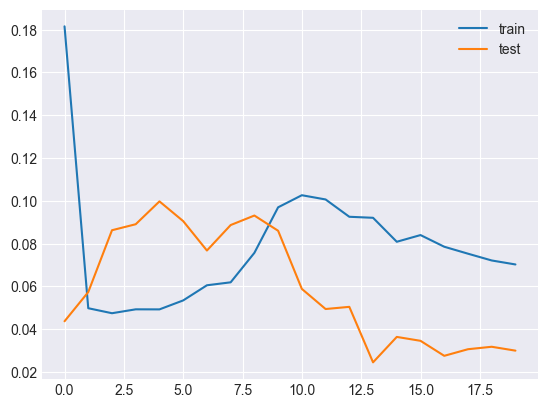

In [146]:

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [20]:
scores

0.02674523325522106

In [147]:
# evaluate the model
scores = model.evaluate(train_X, train_y, verbose=0)
print(model.metrics_names, scores*100)

['loss'] 7.399531453847885


In [20]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [21]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


In [22]:
# make a prediction
yhat = loaded_model.predict(test_X)
test_X.shape

yhat.shape

2/2 [==============================] - 0s 3ms/step


(41, 4)

In [151]:
print(test_X.shape, test_y.shape)

(41, 8, 4) (41, 4)


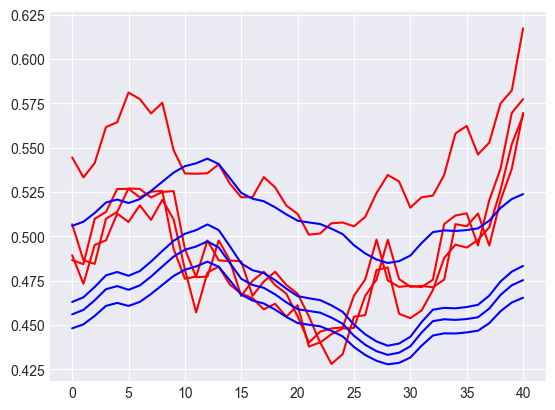

In [149]:
plt.plot(test_y, color='red')
plt.plot(yhat, color='blue')

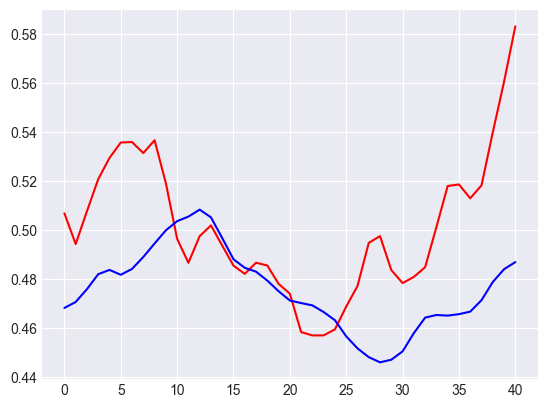

In [150]:
plt.plot(np.average(test_y, axis=1), color='red')
plt.plot(np.average(yhat, axis=1), color='blue')
           
           

In [153]:
test_X[:,-1].shape

(41, 4)

In [165]:
plot_X_pred = np.concatenate((test_X[:,-1],yhat))
plot_X_y = np.concatenate((test_X[:,-1],test_y))
print(plot_X_pred.shape, plot_X_y.shape)

(82, 4) (82, 4)


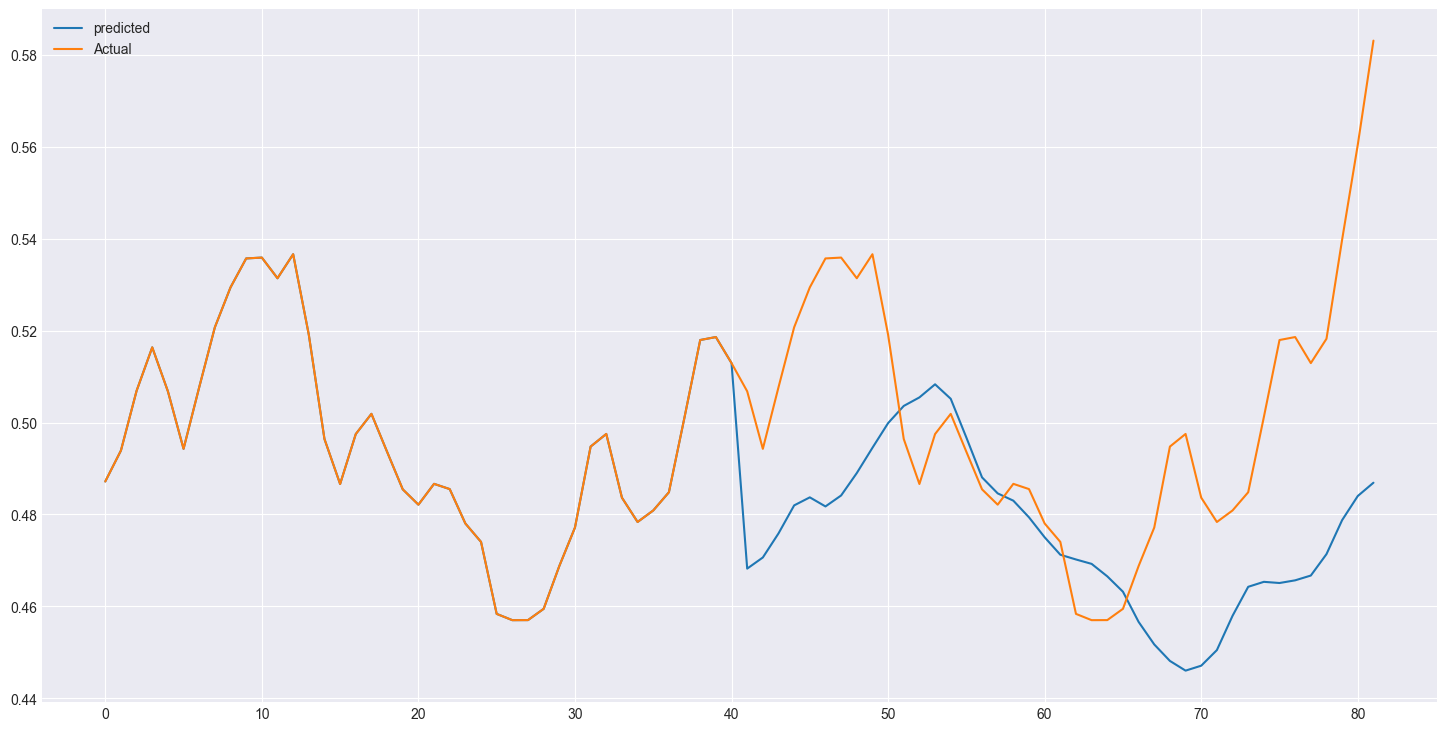

In [170]:
plt.figure(figsize=(18,9))
plt.plot(np.average(plot_X_pred, axis=1), label='predicted')
plt.plot(np.average(plot_X_y, axis=1), label='Actual')
plt.legend()
plt.show()

In [23]:
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

In [24]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -n_hours:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]


# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -n_hours:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.038


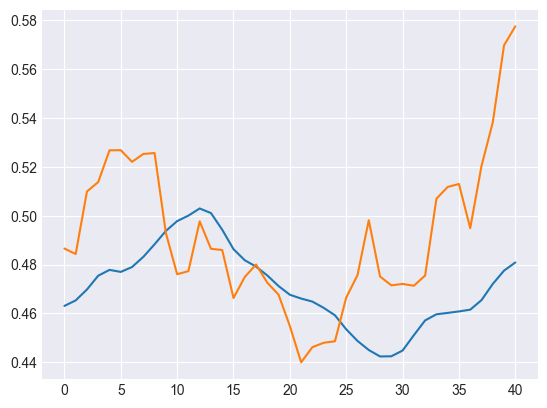

In [25]:
    pyplot.plot(inv_yhat)
    pyplot.plot(inv_y)
    pyplot.show()

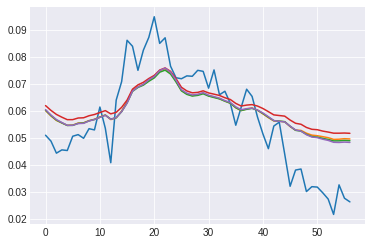

In [71]:
# pyplot.plot(train_X_plot[:,-4:-1])
# pyplot.plot(trainPredict)
# pyplot.show()

pyplot.plot(test_X[:,-1])
pyplot.plot(yhat)
#pyplot.show()

In [72]:
def make_forecast(model, look_back_buffer: np.ndarray, timesteps: int=1, batch_size: int=1):
    forecast_predict = np.empty((0, 1), dtype=np.float32)
    forecast_predict[:, :] = np.nan
    print("forecast_predict and lookBbuffer", forecast_predict.shape,look_back_buffer.shape)
    
    num_elements = look_back_buffer.shape[0]
    time_ahead = look_back_buffer.shape[1]
    feature = look_back_buffer.shape[2]
    
    flag = 1
    for _ in trange(timesteps, desc='predicting data\t', mininterval=1.0):
        # make prediction with current lookback buffer
        #cur_predict = model.predict(look_back_buffer, batch_size)
        cur_predict = model.predict(look_back_buffer, batch_size)
        print("Current predict", cur_predict.shape)
        
        if flag:
            flag = 0
            # add prediction to result
            forecast_predict = np.concatenate((forecast_predict, cur_predict))
            print("forecast predict flag 0:", forecast_predict.shape)
        else:
            # add prediction to result
            forecast_predict = np.concatenate((forecast_predict, cur_predict[-1:]), axis=0)
            print("forecast predict flag 1:", forecast_predict.shape)
            
        #‘C’ means to flaten in row-major (C-style) order.       
        look_back_buffer = look_back_buffer.flatten()
        look_back_buffer = np.delete(look_back_buffer, 0, axis=0)
        print("look_back_buffer",look_back_buffer.shape)
                        
        # cur_predict = cur_predict.flatten()
        look_back_buffer = np.concatenate((look_back_buffer,cur_predict[-1:]))
        look_back_buffer = look_back_buffer.reshape(num_elements,time_ahead,feature)        
        
    return forecast_predict